<a href="https://colab.research.google.com/github/ratheesh-17/AIOT-Environment-Status-Classifier/blob/main/AIOT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imprting the Dependencies

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

Generating the Dataset

In [8]:
np.random.seed(42)
temperature = np.random.uniform(15, 40, 1000)
humidity = np.random.uniform(20, 80, 1000)
# Simple rule-based labeling
labels = []
for t, h in zip(temperature, humidity):
  if t > 35 or h < 25:
    labels.append("Critical")
  elif 30 <= t <= 35 or 25 <= h <= 35:
    labels.append("Warning")
  else:
    labels.append("Normal")
data =  pd.DataFrame({'temperature': temperature, 'humidity': humidity, 'status': labels})

Training the Model

In [9]:
X = data[['temperature', 'humidity']]
y = data['status']
# Encode target labels
y_encoded = pd.factorize(y)[0]
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2,
random_state=42)

Displaying Classification Report

In [10]:
# Train classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=pd.unique(y)))

Classification Report:
              precision    recall  f1-score   support

     Warning       1.00      1.00      1.00        57
    Critical       1.00      1.00      1.00        53
      Normal       1.00      1.00      1.00        90

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Visualizing the Confusion Matrix

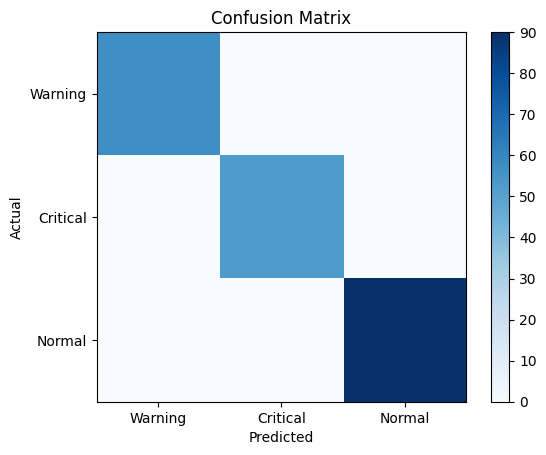

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.xticks(ticks=[0, 1, 2], labels=pd.unique(y))
plt.yticks(ticks=[0, 1, 2], labels=pd.unique(y))
plt.colorbar()
plt.show()